Name: Swaraj Andhale

Roll no: 21102A0011

Branch-Div: BE CMPN A

Batch 1

[GitHub](https://github.com/swaraj150/ml_exps/blob/master/ml_exp_2.ipynb)

## Titanic Survival Prediction Using Logistic Regression


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Explore the Data

In [3]:
df = pd.read_csv('/content/gender_submission.csv')

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000
PassengerId    0
Survived       0
dtype: int64


### Data Preprocessing

In [6]:
df = pd.read_csv('/content/train.csv') 

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

### Define Features and Target Variable

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

### Split the Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build and Train the Model

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Make Predictions

In [10]:
y_pred = model.predict(X_test)

### Evaluate the Model

In [11]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

### Interpret the Results

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Feature Importance:
 Embarked_Q    0.123509
Fare          0.002536
Age          -0.030684
Parch        -0.106164
SibSp        -0.292993
Embarked_S   -0.320026
Pclass       -0.975772
Sex_male     -2.594360
dtype: float64


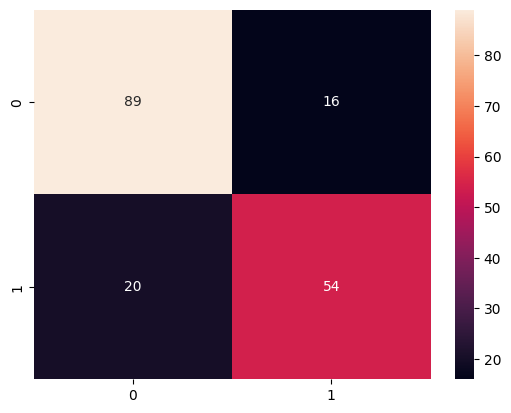

In [12]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {cm}')
print(f'Classification Report:\n {report}')
print(f'Feature Importance:\n {feature_importance}')

sns.heatmap(cm, annot=True, fmt='d')
plt.show()